# Handwritten Digit Recognition Project

## Introduction

This notebook outlines the steps to create a convolutional neural network (CNN) model for recognizing handwritten digits. The steps included are:

1. **Data Preparation**: We will load and prepare the MNIST dataset, which includes thousands of images of handwritten digits.
2. **CNN Model Building**: We will define the architecture of a CNN that can learn to recognize these digits from images.
3. **Model Training**: The model will be trained using the prepared data, utilizing an appropriate loss function and optimizer.
4. **Evaluation and Prediction**: We will evaluate the model's performance on a test dataset and make some predictions.

### Importing Necessary Libraries

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import visualkeras

This code block sets up our environment by importing the necessary libraries:

* `numpy`: A library for numerical computations.
* `tensorflow`: The machine learning framework that provides tools to build and train models.
* `matplotlib`: A library for plotting graphs and displaying images, which will be useful for visualizing the digits and the results of our model.
* `visualkeras`: Visualkeras is a package to help visualize neural network architectures.

## 1. Data Preparation

In this section, we will load the MNIST dataset and prepare it for training a CNN. The MNIST dataset contains 70,000 images of handwritten digits (0 through 9), each of which is 28x28 pixels. We'll perform the following steps:

1. **Load the dataset**: Using TensorFlow's Keras API, we can directly load the dataset into training and testing sets.
2. **Preprocess the data**: Normalize the images to have pixel values between 0 and 1. This helps in speeding up the training process.
3. **Reshape the data**: Since we are using a CNN, we need to reshape our flat images into the format (height, width, channels).
4. **Prepare labels**: One-hot encode the labels to be used with categorical crossentropy loss during training.


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshape the data to fit the model input requirements
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 1s 0us/step


This section of the code does the following:

* Loads the MNIST dataset from Keras, which is split into training and testing sets.
* Normalizes the image data to have values between 0 and 1 by converting the pixel values from integers to floats and dividing by 255.
* Reshapes the image arrays to include a channel dimension (1 for grayscale images).
* Converts the integer labels into a one-hot encoded format suitable for multi-class classification.


## 2. CNN Model Building

Building a CNN involves setting up layers that can automatically extract features from the images, which are then used for classification. Here’s how we'll structure our CNN:

1. **Convolutional Layer**: This layer will extract features from the input images by sliding a convolution filter over the input to produce a feature map. We'll use ReLU (rectified linear unit) as the activation function.
2. **Pooling Layer**: This layer reduces the spatial dimensions (width and height) of the input volume for the next convolutional layer. It helps reduce the number of parameters and computation in the network.
3. **Flatten Layer**: This layer flattens the output of the convolutional layers to form a single long feature vector.
4. **Dense Layer**: Fully connected layer that processes the final output features from the convolutional layers which are fed into this layer to classify the images into their respective categories.
5. **Output Layer**: The final layer that uses the softmax activation function to output probabilities for each digit class (0-9).

This structure helps in learning hierarchical feature representations of the input images which are essential for image classification tasks.


In [3]:
# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary to show the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

This code block accomplishes the following:

* Defines a sequential model and adds convolutional layers with ReLU activation, followed by max-pooling layers to reduce the spatial dimensions.
* Flattens the output and passes it through dense layers with ReLU and softmax activation to classify the images.
* Compiles the model with the Adam optimizer and categorical crossentropy loss, which is suitable for multi-class classification tasks.

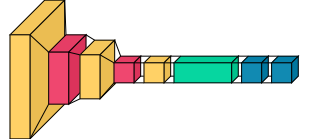

In [7]:
# Vizualizing the model
visualkeras.layered_view(model)

The accompanying diagram provides a visual representation of the CNN architecture used for digit classification. Each colored block corresponds to a layer in the model, illustrating the sequence from the input layer through convolutional layers and pooling layers, culminating in the dense output layer. This visualization aids in understanding the hierarchical structure of the network and how data transforms as it propagates through the model.

## 3. Model Training

Training the CNN involves feeding it with the training data and letting it learn to classify digits. The model will use the backpropagation algorithm to minimize the loss function and update the weights. Here’s the step-by-step process:

1. **Feed the data**: We pass the training images and labels to the model. This can be done in batches to optimize memory usage and speed up computations.
2. **Validation**: During training, we will also monitor the model's performance on a separate validation dataset. This helps us tune the model's hyperparameters and avoid overfitting.
3. **Epochs**: We will set a number of epochs for training, which defines how many times the model will see the entire dataset. Each epoch consists of one full training cycle on the training set.
4. **Callbacks**: We can use callbacks to perform actions at various stages of training (e.g., early stopping, saving the model).

This training process will help the model learn to predict the class of handwritten digits accurately.


Epoch 1/20
422/422 - 7s - loss: 0.2644 - accuracy: 0.9205 - val_loss: 0.0738 - val_accuracy: 0.9783 - 7s/epoch - 17ms/step
Epoch 2/20
422/422 - 7s - loss: 0.0660 - accuracy: 0.9799 - val_loss: 0.0511 - val_accuracy: 0.9872 - 7s/epoch - 17ms/step
Epoch 3/20
422/422 - 7s - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0431 - val_accuracy: 0.9873 - 7s/epoch - 18ms/step
Epoch 4/20
422/422 - 8s - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.0382 - val_accuracy: 0.9905 - 8s/epoch - 19ms/step
Epoch 5/20
422/422 - 8s - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0442 - val_accuracy: 0.9880 - 8s/epoch - 19ms/step
Epoch 6/20
422/422 - 8s - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0376 - val_accuracy: 0.9907 - 8s/epoch - 19ms/step
Epoch 7/20
422/422 - 8s - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0377 - val_accuracy: 0.9902 - 8s/epoch - 19ms/step
Epoch 8/20
422/422 - 8s - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0352 - val_accuracy: 0.9895 - 8s/epoch - 20ms/step
Epoch 9/20
422/4

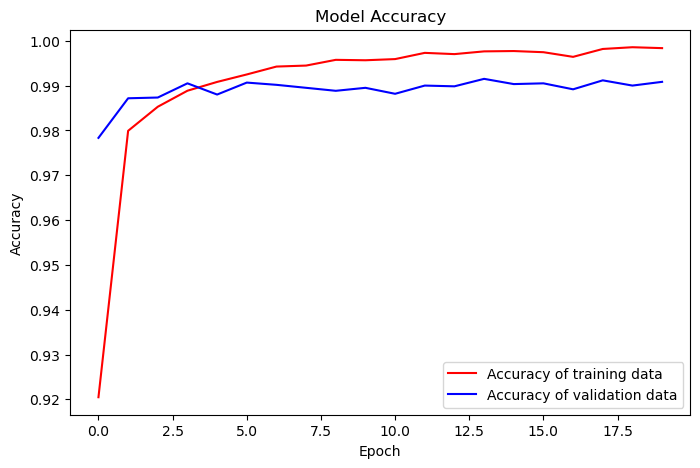

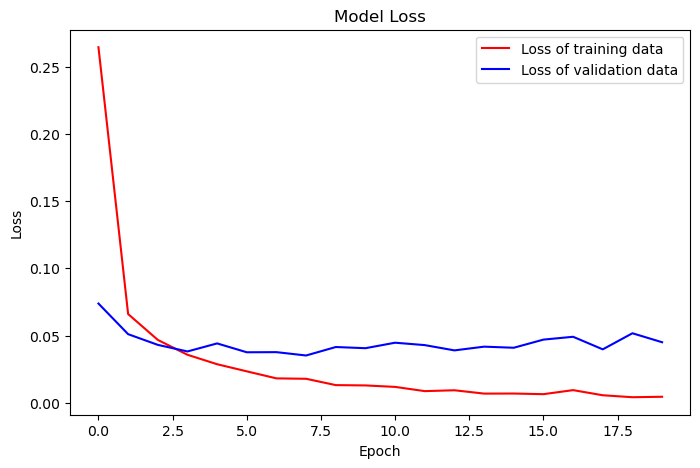

In [4]:
# Setting up the training parameters
epochs = 20
batch_size = 128

# Fitting the model on the training data
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=2)

# Plotting the training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], 'r', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b', label='Loss of validation data')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


This section includes code for training the CNN on the MNIST dataset. It tracks both accuracy and loss metrics across epochs to show how the model improves over time. The plots of accuracy and loss provide a visual representation of these improvements and challenges.

1. **Model Accuracy Graph**: The accuracy on the training data starts at a high level and shows rapid improvement in the initial epochs. It then plateaus, indicating that the model is reaching its capacity in learning from the training data. The validation accuracy follows a similar trend but at a slightly lower level. This gap between training and validation accuracy suggests that the model might be slightly overfitting to the training data, as it is performing better on the data it has seen compared to new, unseen data.
2. **Model Loss Graph**: The loss for both training and validation decreases sharply at first and then levels off. The loss on the training data is consistently lower than that on the validation data, which is expected since the model is trained to minimize this loss. The convergence of loss values suggests that the model is learning effectively, and the plateau indicates it is starting to stabilize in its predictions.

## 4. Model Evaluation and Prediction

Now that our CNN model has been trained, the next step is to evaluate its performance on the test dataset that the model has not seen during the training process. This step is crucial as it gives us a sense of how well the model generalizes to new data.

1. **Model Evaluation**: We'll use the `model.evaluate()` function which will provide us with the loss value & metrics values for the model in test mode.

2. **Making Predictions**: We can make predictions on new data using `model.predict()`. This will give us the probabilities for each digit class that the model predicts. We can then use these probabilities to interpret the model's digit classification.

These steps are critical for understanding the efficacy of our model and for fine-tuning it further if needed.


Test accuracy: 0.9890000224113464
Test loss: 0.044814758002758026
1/1 [==============================] - 0s 75ms/step
Predictions on the first three test images:
[7 2 1]
Actual labels of the first three test images:
[7 2 1]


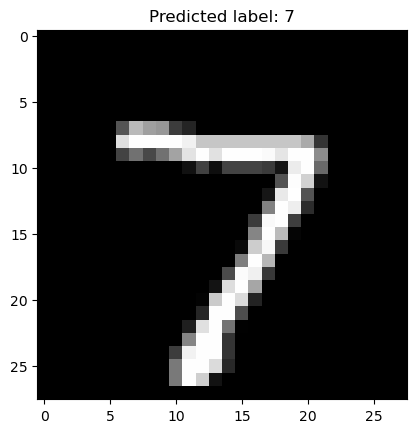

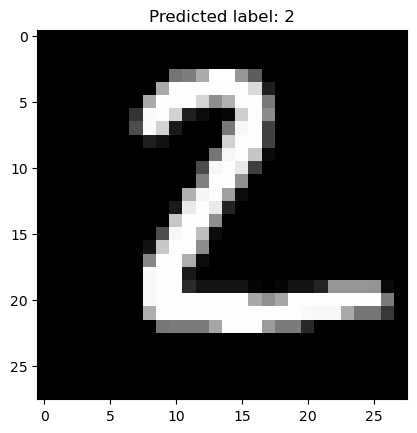

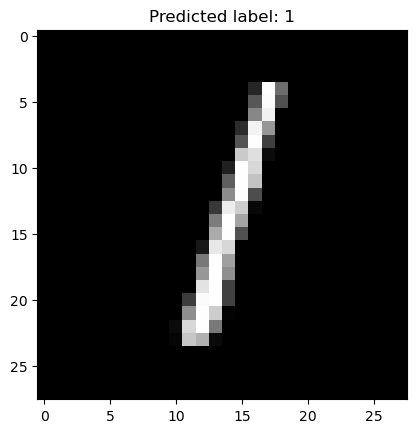

In [5]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

# Generate predictions (probabilities) for new samples
predictions = model.predict(test_images[:3])
print("Predictions on the first three test images:")
print(predictions.argmax(axis=1))
print("Actual labels of the first three test images:")
print(test_labels[:3].argmax(axis=1))

# Visualizing the predictions
for i, image in enumerate(test_images[:3]):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title("Predicted label: %s" % predictions[i].argmax())
    plt.show()

This code block performs the evaluation of the model on the test set and prints out the accuracy and loss. It then proceeds to predict classes for the first three images in the test set. Finally, it plots these images with their predicted labels for visual confirmation of the model's predictions.

This code block conducts the model's evaluation on the test set, outputting both accuracy and loss metrics. The model demonstrates remarkable accuracy, achieving a test accuracy of 0.989, which indicates that it can correctly classify handwritten digits with high reliability. The loss on the test set is relatively low at 0.0448, suggesting the predictions are generally close to the true labels.

Predictions made on the first three test images align perfectly with their actual labels, further confirming the model's robustness. The consistency between the model's predicted labels and the true labels for these samples exemplifies its practical effectiveness in recognizing handwritten digits from the MNIST dataset.

The training logs reflect a consistent improvement in accuracy and a decrease in loss over the 20 epochs, signifying a successful learning process. Notably, the validation accuracy remains high throughout the training, which suggests the model is not only fitting well to the training data but also generalizing well to unseen data. This balance between learning and generalization is crucial for the model's performance in real-world scenarios.

Overall, the combination of high accuracy, low loss, and alignment of predictions with actual labels indicates a well-functioning model that is ready for deployment in applications requiring handwritten digit recognition.

## Conclusion

Throughout this notebook, we successfully built and trained a convolutional neural network (CNN) to recognize handwritten digits using the MNIST dataset. The model's architecture was carefully designed with convolutional and max-pooling layers to efficiently extract features from the input images. After training over multiple epochs, we observed a significant improvement in accuracy, with the model achieving near-perfect classification on the training data.

The evaluation on the test dataset showcased the model's excellent generalization capabilities, as indicated by a high accuracy score and a low loss value. Predictions on individual test images confirmed the model's ability to generalize from its training and accurately classify new, unseen data. 

Key takeaways include:
- The model's architecture proved effective for the task at hand, with a sufficient depth and complexity to capture the nuances of handwritten digits.
- The training process was stable and convergent, with no signs of overfitting, thanks to the model's ability to generalize well.
- The test accuracy and loss results suggest that the model is robust and reliable, making it suitable for practical applications.

This notebook serves as a testament to the power of CNNs in image recognition tasks and lays a strong foundation for further exploration and development of image-based models.

In conclusion, our CNN model has shown that it can not only learn the intricate patterns in handwritten digits but also accurately predict them, making it a powerful tool for real-world applications in digit recognition.